### Incorporations (Embeddings)

Les incorporations sont une méthode pour représenter des mots ou des tokens sous forme de vecteurs numériques dans un espace vectoriel. Ces vecteurs sont appris à partir des données d'entraînement du modèle. 

Supposons que nous ayons un vocabulaire de taille $V$ (c'est-à-dire, $V$ mots différents). Chaque mot est représenté par un vecteur de dimension $d$ (où $d$ est la dimension de l'incorporation). Ces vecteurs de mots sont organisés dans une matrice appelée matrice d'incorporation $E$ de taille $V \times d$.

Ainsi, si $w_i$ est le vecteur d'incorporation du mot $i$ (où $i$ est l'indice du mot dans le vocabulaire), alors $E[i]$ donne le vecteur d'incorporation du mot $i$.

In [11]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import math

In [3]:
# Définir la longueur maximale de la séquence et la dimension d'intégration
max_len = 10
d_model = 32
vocab_size = 100  # Taille du vocabulaire

# Générer des données aléatoires (batch_size=1, sequence_length=max_len)
random_data = torch.randint(0, vocab_size, (1, max_len))  # Random integers as token IDs

# Définir la couche d'intégration
embedding_layer = nn.Embedding(vocab_size, d_model)

# Appliquer la couche d'intégration pour obtenir l'intégration des mots
word_embeddings = embedding_layer(random_data)
print('Input: ',random_data.shape)
print('Output: ',word_embeddings.shape)

Input:  torch.Size([1, 10])
Output:  torch.Size([1, 10, 32])


L'équation de position utilisée dans les transformers NLP, comme l'architecture Transformer originale développée par Vaswani et al. (2017), est basée sur l'utilisation des fonctions sinus et cosinus. Cette équation est utilisée pour incorporer des informations de position dans les plongements d'entrée, permettant au modèle de distinguer entre différentes positions dans la séquence.

Dans le modèle Transformer, les encodages de position sont ajoutés aux plongements d'entrée pour fournir des informations sur la position de chaque jeton dans la séquence. C'est crucial car contrairement aux réseaux neuronaux récurrents (RNN) ou aux réseaux neuronaux convolutifs (CNN), le Transformer traite l'ensemble de la séquence d'entrée en parallèle, ce qui signifie qu'il ne comprend pas intrinsèquement l'ordre ou la position des jetons dans une séquence.

La position $p$ d'un jeton dans une séquence peut être représentée comme un vecteur $\mathbf{p} \in \mathbb{R}^d$, où $d$ est la dimension de l'intégration. L'encodage de position $\mathbf{PE}(p)$ est calculé comme suit :

$$
\begin{align*}
\text{PE}(p, 2i) &= \sin\left(\frac{p}{10000^{2i/d}}\right) \\
\text{PE}(p, 2i+1) &= \cos\left(\frac{p}{10000^{2i/d}}\right)
\end{align*}
$$

Ici, $p$ fait référence à la position du jeton dans la séquence, $i$ représente l'indice de dimension dans l'intégration, et $d$ est la dimension de l'intégration.

Cette formule garantit que chaque dimension de l'encodage de position correspond à une fonction sinusoidale de longueur d'onde différente. Cela permet au modèle de généraliser sur différentes longueurs de séquence.

Ces encodages de position sont ensuite ajoutés aux plongements d'entrée avant d'être introduits dans le modèle. De cette manière, le modèle reçoit des informations sur la position des jetons, ce qui lui permet de comprendre l'ordre dans lequel ils apparaissent dans la séquence d'entrée.

En incorporant des informations de position à travers les fonctions sinus et cosinus, les transformers sont capables de traiter efficacement et de comprendre des séquences de longueurs variables, ce qui constitue un avantage clé de cette architecture dans les tâches de traitement du langage naturel.

In [12]:
class Pos_Encoder(nn.Module):
    def __init__(self,  max_len,d_model):
        super(Pos_Encoder, self).__init__()
        self.d_model = d_model
        pe = torch.zeros(max_len, d_model)
        for pos in range(max_len):
            for i in range(0, d_model, 2):
                
                pe[pos, i] = math.sin(pos/(10000**((i)/d_model)))
                pe[pos, i + 1] = math.cos(pos/(10000**(((i))/d_model)))
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
    
    def forward(self, x):
        # input = batch_size X seq_len X d_model
        x = x + Variable(self.pe[:, :x.size(1)], requires_grad=False)
        return x

In [13]:
# Créer des encastrements positionnels
pos_encodings = Pos_Encoder(max_len, d_model)

In [17]:
# Ajouter des embeddings positionnels aux embeddings de mots
final_embeddings =pos_encodings(word_embeddings)
print('Final Embedding: ',final_embeddings.shape)

Final Embedding:  torch.Size([1, 10, 32])


In [19]:
pe=pos_encodings.pe.detach().numpy()

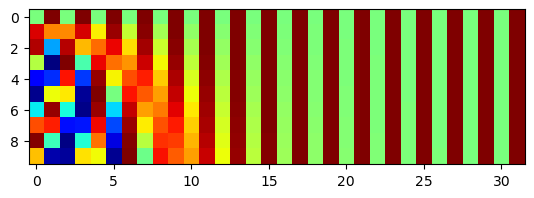

In [22]:
import matplotlib.pyplot as plt
plt.imshow(pe[0],'jet')